In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.simplefilter('ignore')

In [2]:
df = pd.read_csv(r'C:\Users\sahur\Downloads\DATASET OF DATA SCIENCE SRK SIR\diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df['Outcome'].unique()

array([1, 0], dtype=int64)

In [5]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [6]:
continuous = [ 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']

discrete_count = ['Pregnancies']

discrete_categorical = ['Outcome']

**Exploratory Data Analysis**

In [7]:
df[continuous].describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [8]:
df[continuous].skew()

Glucose                     0.173754
BloodPressure              -1.843608
SkinThickness               0.109372
Insulin                     2.272251
BMI                        -0.428982
DiabetesPedigreeFunction    1.919911
Age                         1.129597
dtype: float64

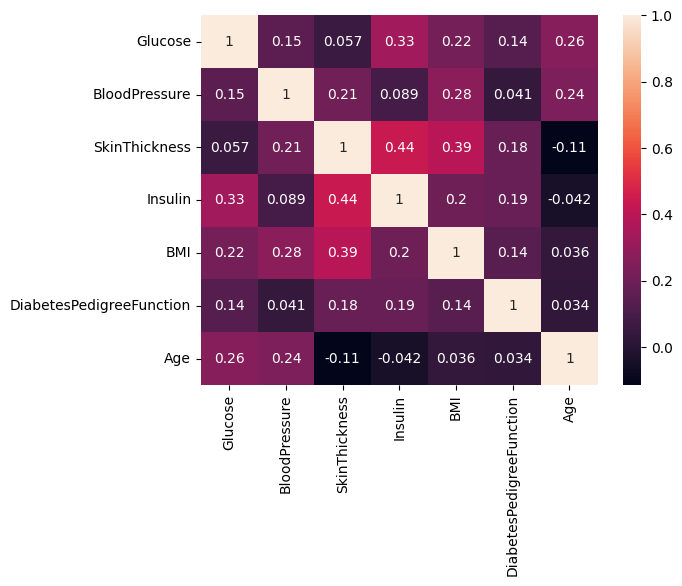

In [9]:
sns.heatmap(df[continuous].corr(),annot = True)
plt.show()

**Data Cleaning**

In [10]:
df.isnull().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

**X & Y**

In [11]:
X = df.drop('Outcome',axis = 1)
y = df['Outcome']

In [12]:

from sklearn.model_selection import train_test_split
X_train ,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.8,random_state = 16)

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train.iloc[:,1:8] = sc.fit_transform(X_train.iloc[:,1:8])
X_test.iloc[:,1:8] = sc.transform(X_test.iloc[:,1:8])

In [14]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
171,6,0.399917,0.052795,0.128089,0.412504,0.399967,0.220621,-0.359850
222,7,-0.062569,-3.520604,-1.300722,-0.694292,-0.872596,-0.790785,0.343806
565,2,-0.802546,-0.763982,-0.431011,0.054924,-0.760311,0.846296,-0.975548
576,6,-0.401725,-1.274468,-0.058278,0.412504,-1.022309,1.043718,0.167892
152,9,1.078230,0.869571,0.438700,0.625349,0.262730,2.185726,0.783590
...,...,...,...,...,...,...,...,...
321,3,-0.278395,0.256989,0.562945,-0.694292,-0.074125,-0.827232,-0.711677
581,6,-0.370892,-0.457691,0.376578,-0.694292,-0.897548,-0.799896,-0.535764
121,6,-0.309228,-0.253497,1.122044,-0.694292,0.250254,-0.635884,-0.799634
238,9,1.324889,0.767474,0.003845,-0.694292,-0.173934,1.098388,-0.095979


### Modelling

**Decision Tree Classifier-with default Hyperparameters**

In [15]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

model.fit(X_train,y_train)

DecisionTreeClassifier()

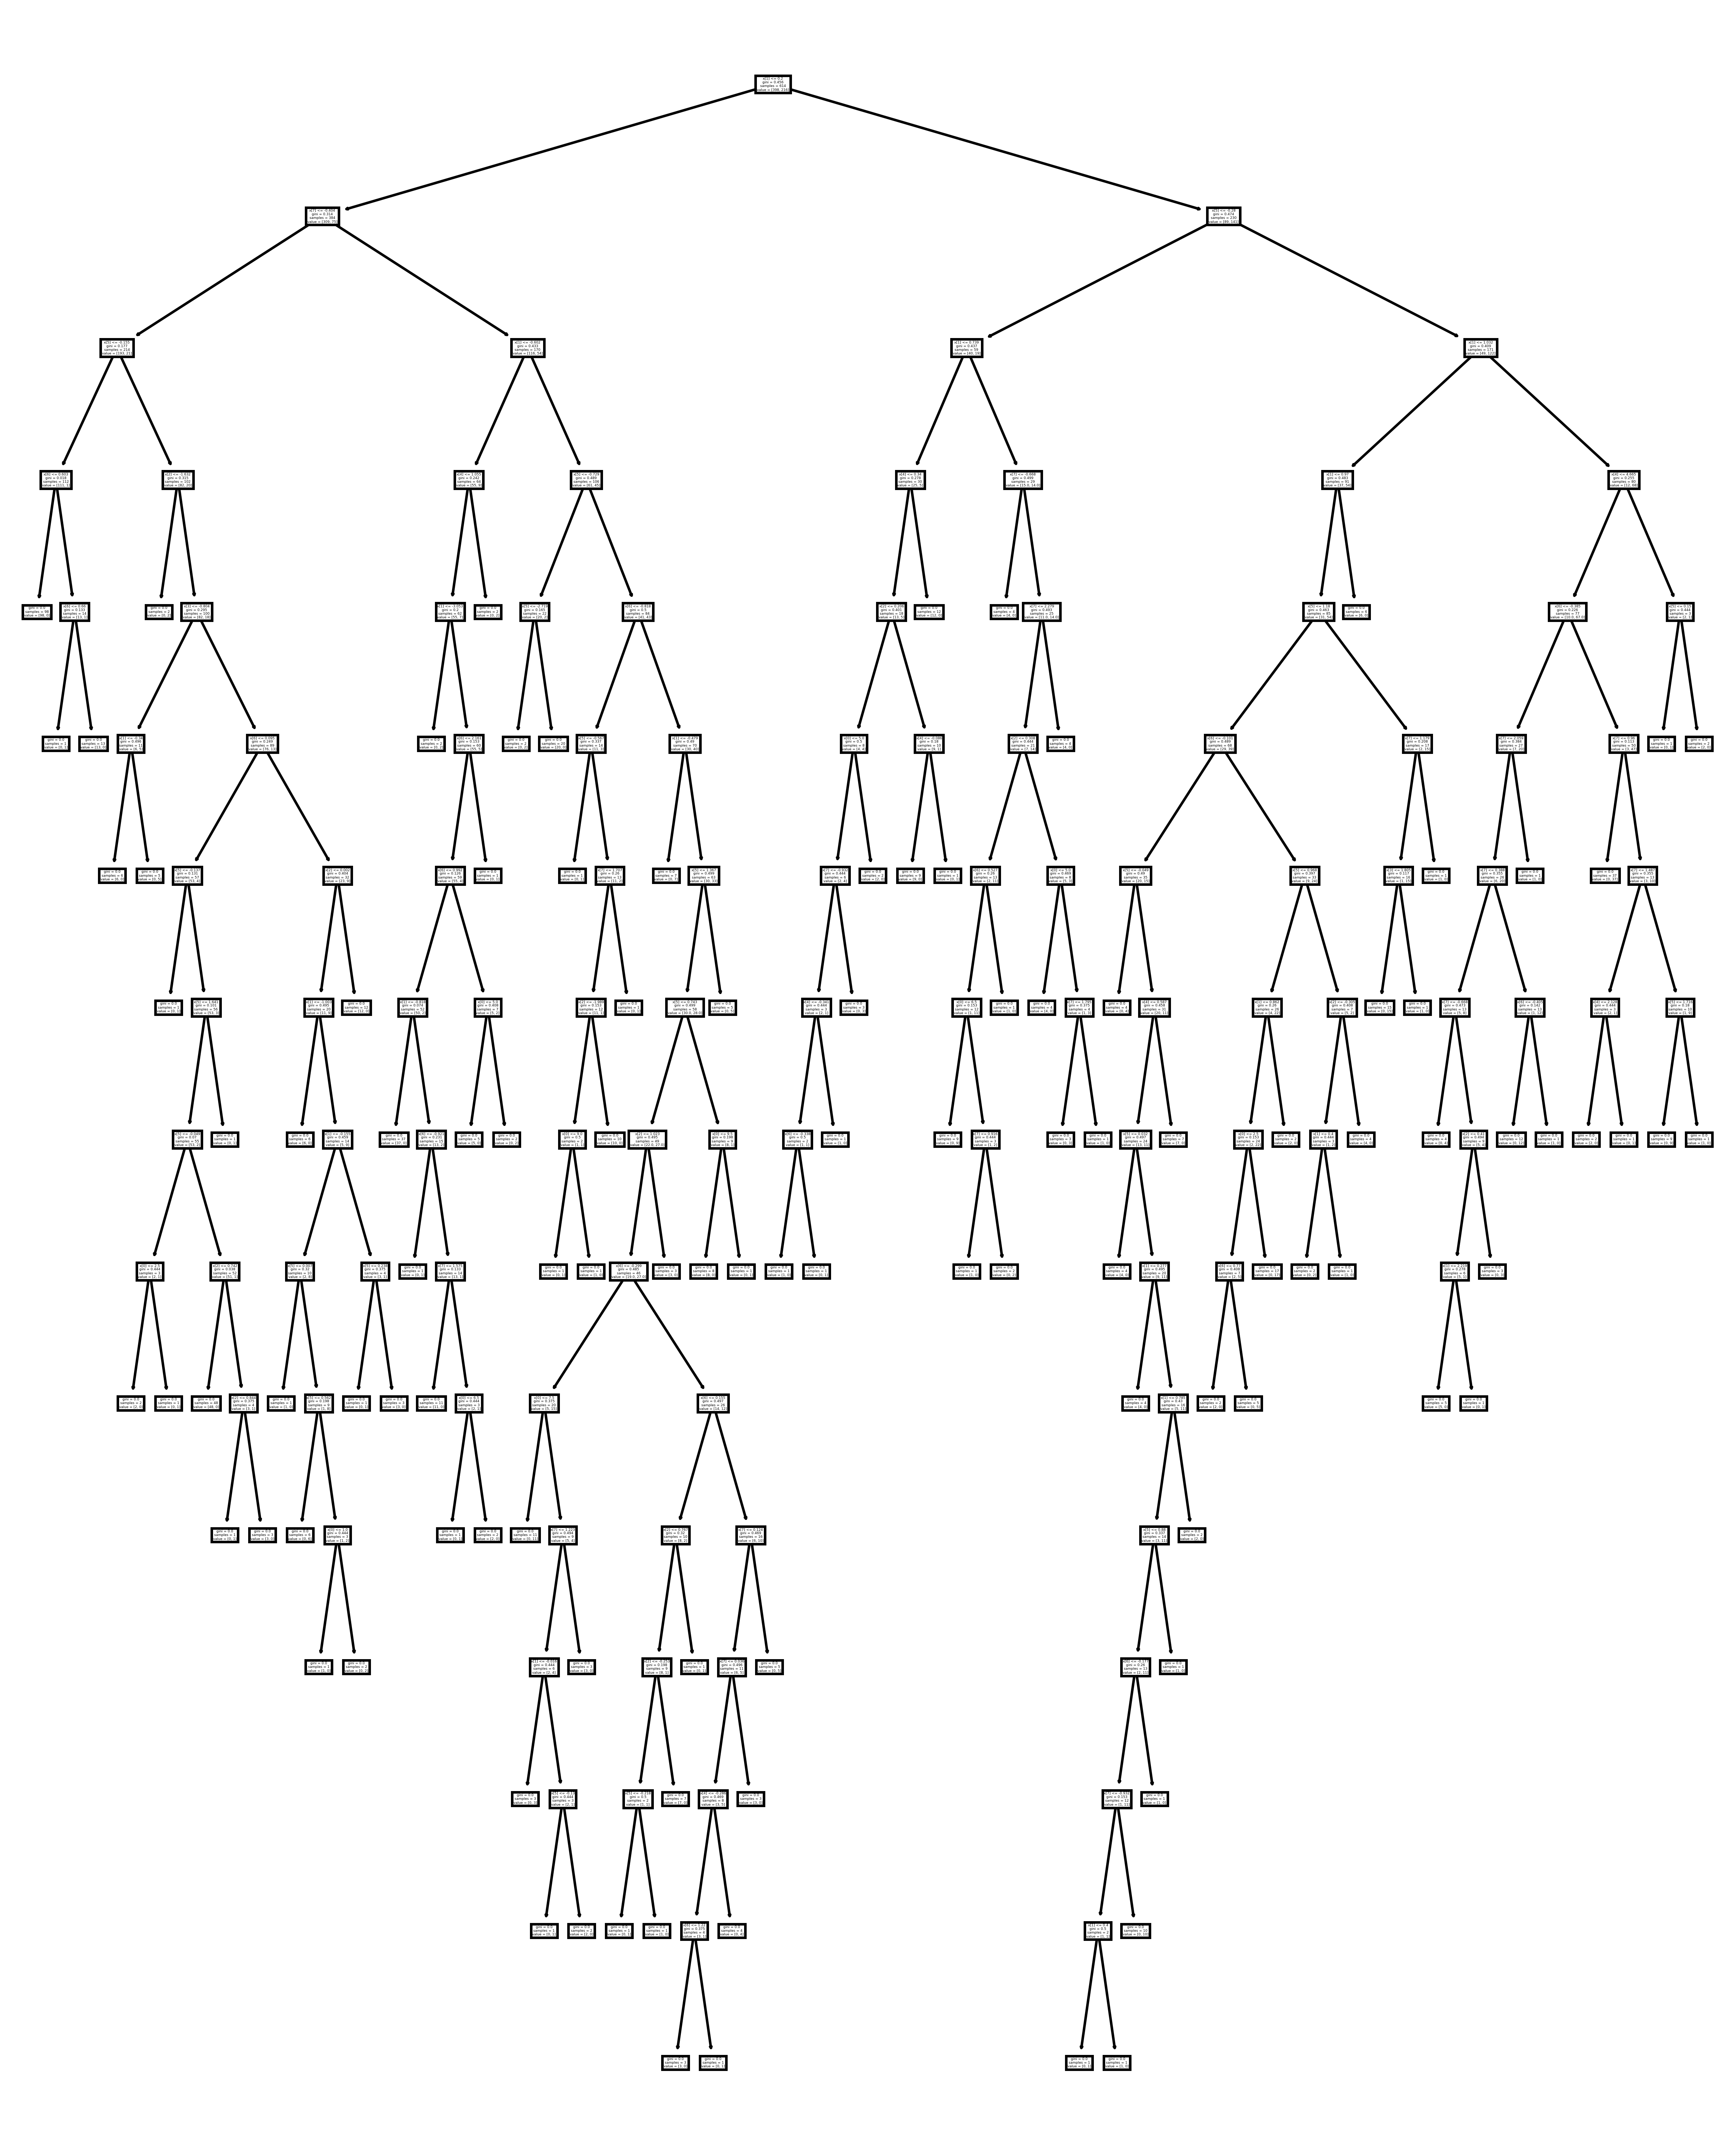

<Figure size 640x480 with 0 Axes>

In [16]:
from sklearn.tree import plot_tree
plt.figure(figsize =[12,15],dpi = 500)
plot_tree(model)

plt.show()

plt.savefig('rk.jpg',dpi = 500)

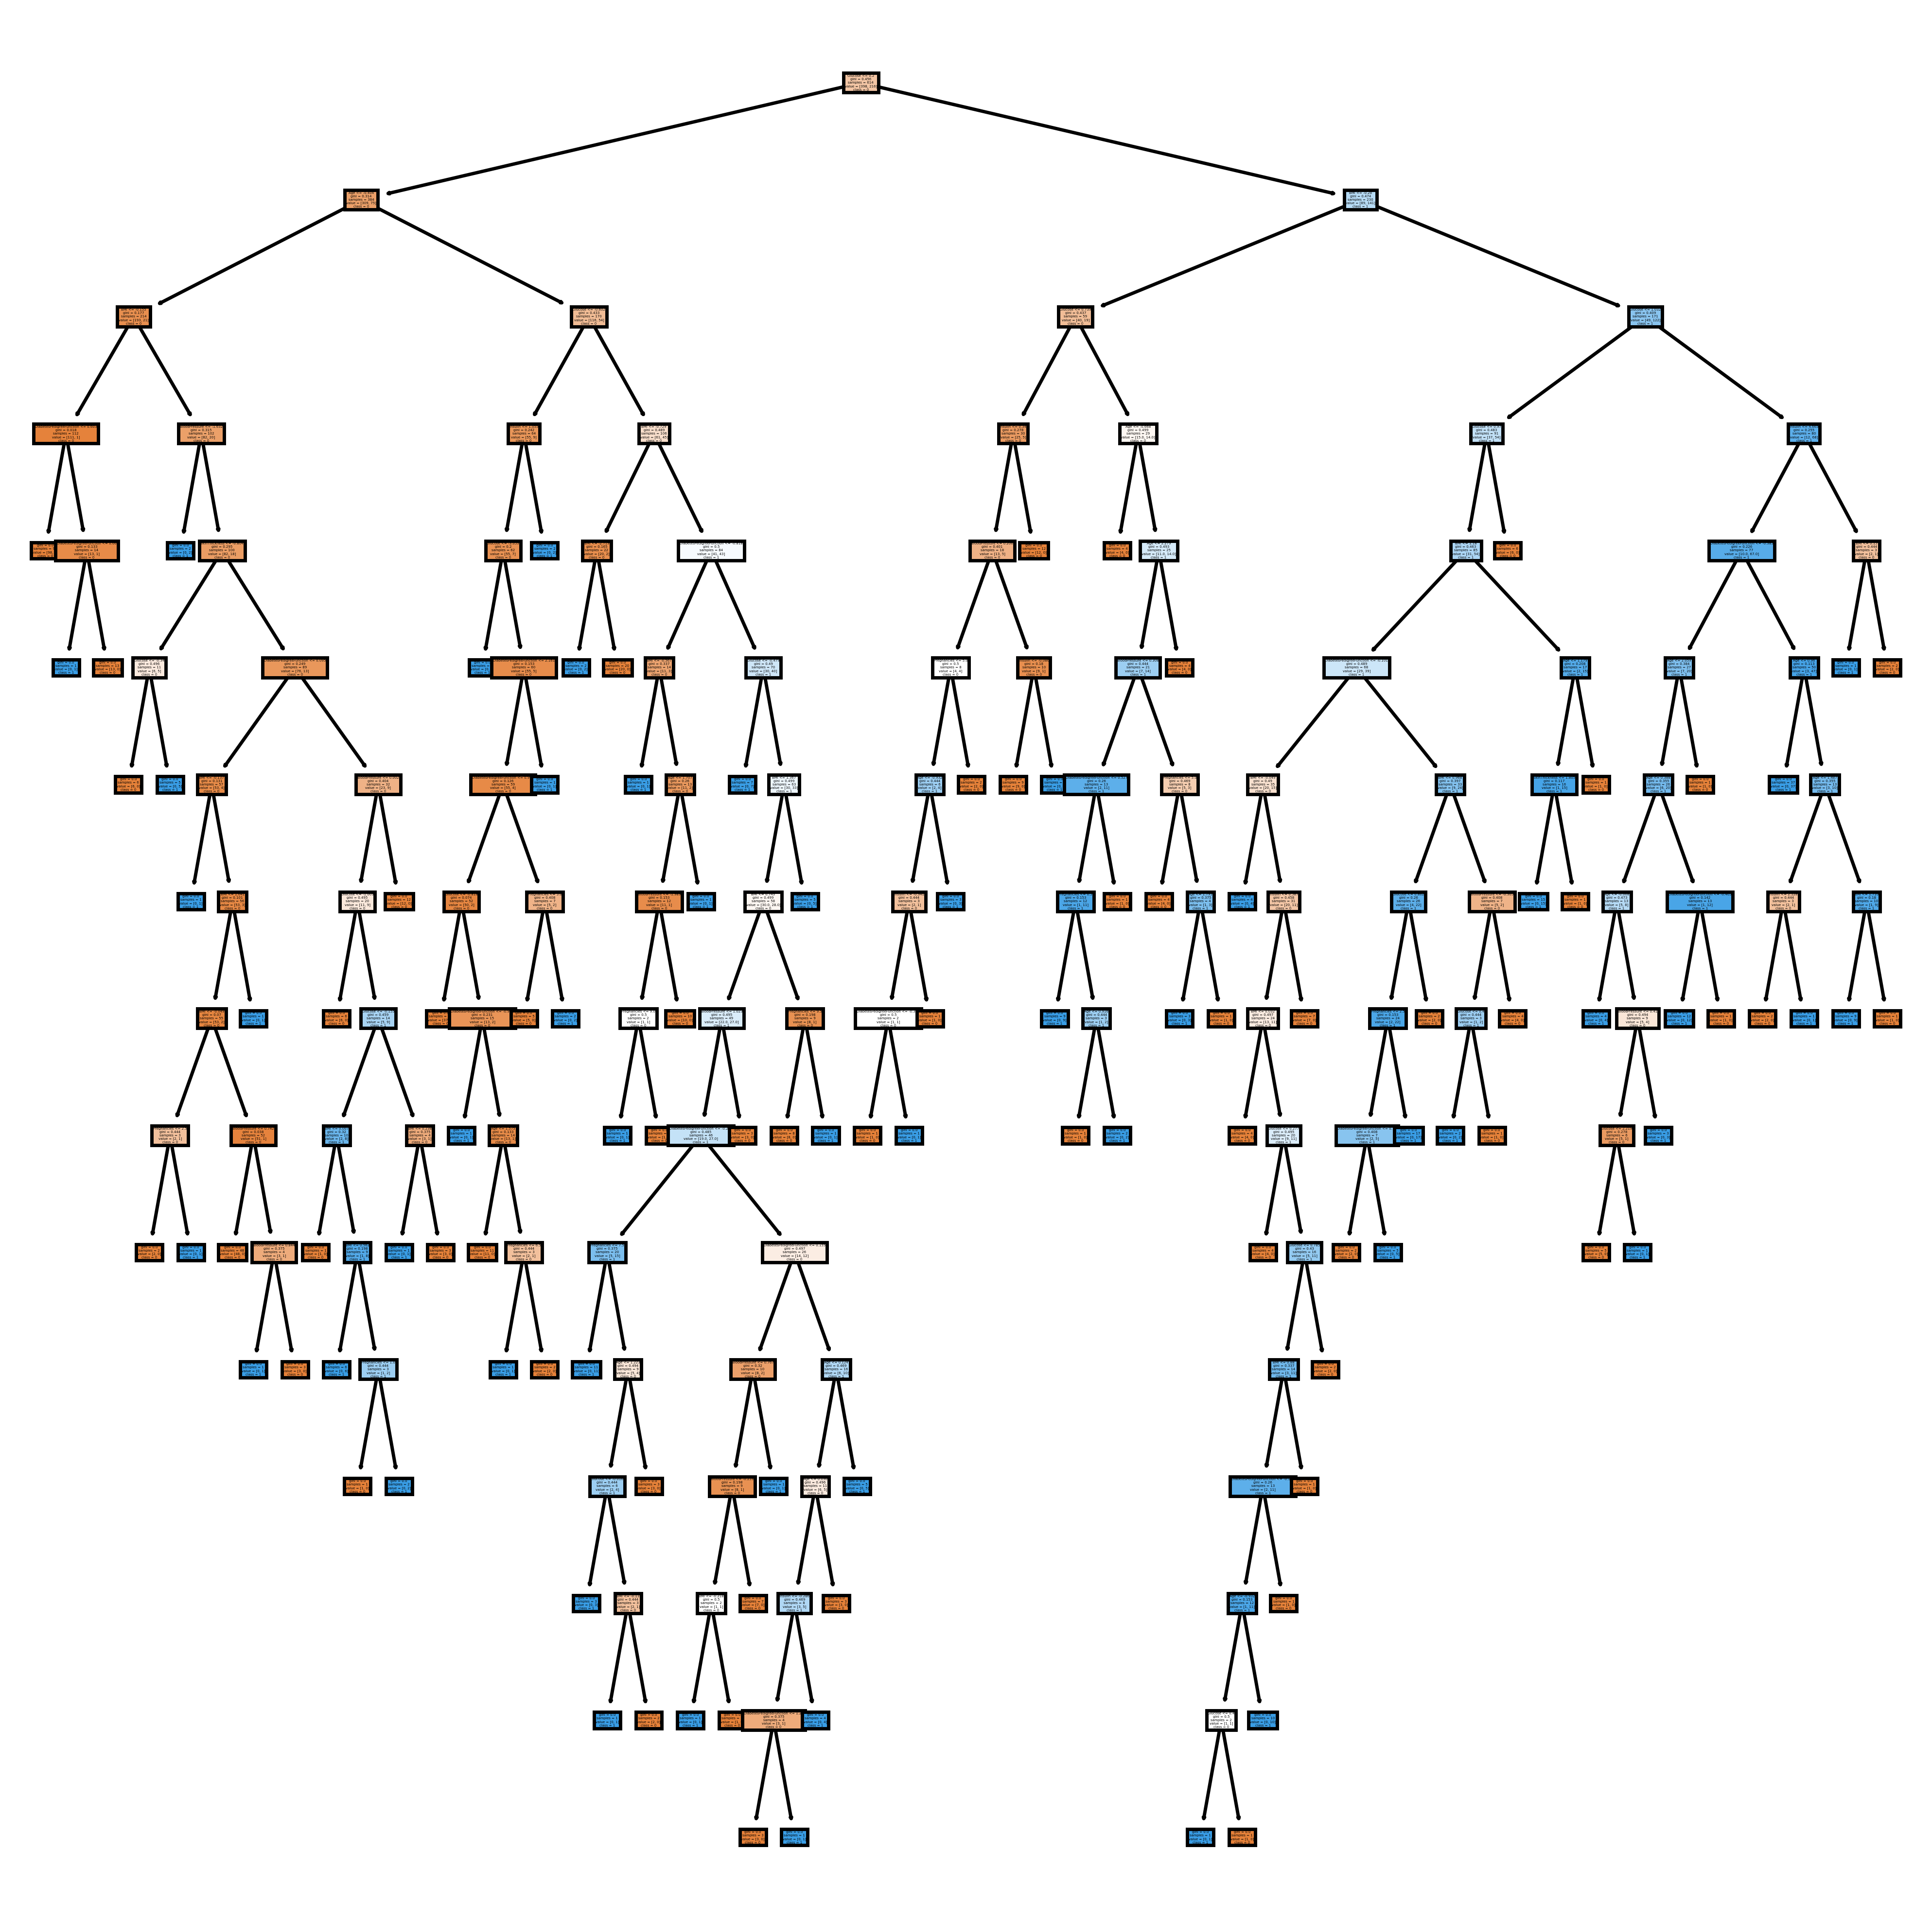

In [17]:
from sklearn.tree import plot_tree

plt.figure(figsize = (10,10),dpi = 500)

plot_tree(model,filled=True, # filled = True it fill the color in nodes 
         feature_names = X_train.columns.tolist(),
          class_names = ['0','1']
         )

plt.show()

**Hyperperameter Tuning using GridSearchCV**

In [18]:
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier
estimator = DecisionTreeClassifier(random_state =0)

# parameters(which you want to tune and identify the best)
param_grid = {'criterion':['gini','entropy'],
             'max_depth':range(1,16)}

grid = GridSearchCV(estimator,param_grid,scoring = 'accuracy',cv=5)

grid.fit(X_train,y_train)

grid.best_params_

{'criterion': 'gini', 'max_depth': 2}

**1st(first) model(with parameter)**

In [19]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion = 'gini',max_depth = 2)

model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

**Identify unimportant feature**

In [20]:
model.feature_importances_  

array([0.        , 0.68983652, 0.        , 0.        , 0.        ,
       0.18469725, 0.        , 0.12546622])

**In this Three columns only importance and other columns is not importance because they are zero(0)**

In [21]:
X_train.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [22]:
model.predict([[2,120,90,30,200,40,0.3,25]])

array([1], dtype=int64)

In [23]:
s1 = pd.DataFrame(model.feature_importances_,
                 columns = ['Feature Importance'],
                 index = X_train.columns.tolist())
imp =s1[s1['Feature Importance']>0].index.tolist()
imp

['Glucose', 'BMI', 'Age']

In [24]:
X_train = X_train[imp]
X_test = X_test[imp]

In [25]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion = 'gini',max_depth = 2)

model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

In [26]:
ypred_train = model.predict(X_train)
ypred_test = model.predict(X_test)
# Evaluation 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
print('Train Accuracy:',accuracy_score(y_train,ypred_train))
print('Test Accuracy:',accuracy_score(y_test ,ypred_test))
print('Cross Validation score:',cross_val_score(model,X_train,y_train,cv = 5,scoring = 'accuracy').mean())

Train Accuracy: 0.7671009771986971
Test Accuracy: 0.7922077922077922
Cross Validation score: 0.7573903771824604
